In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    
])

test_path = '/content/drive/MyDrive/Iwant/test'
train_path = '/content/drive/MyDrive/Iwant/train'

train_data = datasets.ImageFolder(train_path, transform= transform)
test_data = datasets.ImageFolder(test_path, transform= transform)

train_data.classes


['cats', 'dogs']

In [19]:
batch = 32

train_loader = DataLoader(train_data, batch_size=batch, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch, shuffle=True)

cats cats dogs dogs dogs cats dogs dogs dogs cats cats cats cats cats cats cats cats cats cats dogs dogs cats cats cats dogs cats cats cats dogs cats dogs cats cats dogs cats dogs dogs cats dogs dogs cats cats dogs cats dogs dogs cats cats cats dogs cats cats dogs cats dogs cats cats dogs cats dogs dogs cats cats cats


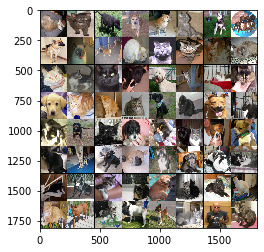

In [6]:
from torchvision.utils import make_grid

img, classes = next(iter(train_loader))

def idx_to_class(x):
    for cls, idx in train_data.class_to_idx.items(): 
        if idx == x: 
            return cls

grid_img = make_grid(img)
plt.imshow(grid_img.permute(1, 2, 0),interpolation='nearest')
print(*[idx_to_class(idx) for idx in classes])

In [7]:
def train(epoches, model, data_loader, optimizer, criterion, dataset_size):
    model.train()

    for epoch in range(epoches):
        running_loss = []
        running_acc = 0
        for X, y in data_loader:
            X = X.to(device)
            y = y.to(device)



            y_pred = model(X)

            loss = criterion(y_pred, y)

            _, pred = torch.max(y_pred, 1)

            running_acc += torch.sum(pred == y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss.append(loss.item())
        print('EPOCH: {}\t LOSS: {}\t ACC: {}'.format(epoch + 1, np.mean(running_loss), running_acc/dataset_size * 100))


In [8]:
def eval(model, data_loader, dataset_size):

    running_acc = 0
    model.eval()
    for X, y in data_loader:

        X = X.to(device)
        y = y.to(device)

        y_pred = model(X)

        loss = criterion(y_pred, y)

        _, pred = torch.max(y_pred, 1)

        running_acc += torch.sum(pred == y)
    print('ACC: {}'.format(running_acc/dataset_size * 100))
    model.train()

In [9]:
from torchvision import models
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [10]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
in_features = model.fc.in_features
output_size = 2

model.fc = nn.Linear(in_features, out_features=output_size)
model = model.to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [20]:
train(10, model, train_loader, optimizer, criterion, len(train_data))

EPOCH: 1	 LOSS: 0.10223702813719253	 ACC: 97.83333587646484
EPOCH: 2	 LOSS: 0.3115698813803886	 ACC: 87.33333587646484
EPOCH: 3	 LOSS: 0.4176573071040605	 ACC: 84.0
EPOCH: 4	 LOSS: 0.3329503567595231	 ACC: 85.5
EPOCH: 5	 LOSS: 0.19161034179361244	 ACC: 92.33333587646484
EPOCH: 6	 LOSS: 0.1268026728771235	 ACC: 95.00000762939453
EPOCH: 7	 LOSS: 0.11777217823423837	 ACC: 95.16667175292969
EPOCH: 8	 LOSS: 0.06884725901641343	 ACC: 97.66667175292969
EPOCH: 9	 LOSS: 0.04189996352713359	 ACC: 98.5
EPOCH: 10	 LOSS: 0.029390410618170312	 ACC: 99.16666412353516


In [21]:
eval(model, test_loader, len(test_data))


ACC: 84.76190185546875
